# Build  spectra for AuxTel

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : March 30th 2021
- creation update : March 31th 2021
- version v0


This notebook is to help for finding the position of order 0

# Imports

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re

plt.rcParams["figure.figsize"] = (12,12)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [44]:
from iminuit import Minuit
import iminuit

In [45]:
iminuit.__version__

'2.2.0'

In [46]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.images import *
from scipy import ndimage, misc

In [47]:
from scipy.stats import kurtosis,skew
from scipy.stats import kurtosistest,skewtest,normaltest

# Function

In [48]:
def file_target(filename):
    m=re.findall('^Cor_ronchi170lpmm_.*_(.*)_[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*[.]fits$',filename)
    if len(m)>0:
        return m
    elif re.search('NGC4755',filename):
        return ['NGC4755']
    else:
        return []

# Logbook for file selection

In [49]:
filename_logbook='logbooks/auxtelronchi170lpmmlogbook_2021_v0.0.csv'

In [50]:
df=pd.read_csv(filename_logbook,index_col=0)

In [51]:
pd.set_option('display.max_rows', None)

In [52]:
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2021-03-12T01:19:36.315,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188...,188,HD75519,RG610,ronchi170lpmm,1.033813,5.0,...,11.7,50.0,0.9,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,2021-03-12T01:20:18.220,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189...,189,HD75519,RG610,ronchi170lpmm,1.033311,5.0,...,11.7,55.0,0.8,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2021-03-12T01:20:33.072,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190...,190,HD75519,RG610,ronchi170lpmm,1.033136,5.0,...,11.7,55.0,0.8,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,2021-03-12T01:52:19.566,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200...,200,HD75519,RG610,ronchi170lpmm,1.017516,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,2021-03-12T01:52:28.549,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201...,201,HD75519,RG610,ronchi170lpmm,1.017474,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,2021-03-12T01:52:38.095,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202...,202,HD75519,RG610,ronchi170lpmm,1.017430,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,2021-03-12T01:52:47.124,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203...,203,HD75519,RG610,ronchi170lpmm,1.017389,5.0,...,11.6,49.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
7,7,2021-03-12T02:00:08.356,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204...,204,HD75519,RG610,ronchi170lpmm,1.015876,5.0,...,11.7,49.0,1.2,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,2021-03-12T02:01:03.092,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205...,205,HD75519,RG610,ronchi170lpmm,1.015722,5.0,...,11.8,50.0,0.3,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,2021-03-12T02:01:12.571,/sps/lsst/groups/auxtel/data/2021/ronchi170lpm...,Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206...,206,HD75519,RG610,ronchi170lpmm,1.015696,5.0,...,11.8,50.0,0.5,NaN,NaN,NaN,NaN,,NaN,NaN


# Selection of input file

In [53]:
myhome=os.getenv("HOME")

In [54]:
#dir_spectra="/Users/dagoret/DATA/AuxTelData2021/holo/FlipCleans"
dir_images=os.path.join(myhome,"DATA/AuxTelData2021/ronchi170lpmm/FlipCleans")

In [55]:
#filename_image="Cor_holo4_003_RG610_HD75519_2021-03-11_296.fits"

In [114]:
filename_image=df['file'][10]
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits'

In [115]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits'

In [116]:
file_target(filename_image)

['HD75519']

In [117]:
filename=os.path.join(dir_images,filename_image)
output_directory="./outputs_ronchi170lpmm/"
guess = [250,2600]
disperser_label = "ronchi170lpmm"
config = "config/auxtel_quicklook.ini"
#config = "config/auxtel.ini"
target = file_target(filename_image)[0]

In [118]:
#spectractor_dir="/Users/dagoret/MacOSX/GitHub/LSST/SpectractorNew/spectractor"

# Configuration of the running mode

In [119]:
parameters.debug=True
parameters.verbose=True
parameters.display=True
parameters.LIVE_FIT=False

In [120]:
#parameters.DISPERSER_DIR = os.path.join(spectractor_dir, "extractor/dispersers/")
#parameters.CONFIG_DIR = os.path.join(spectractor_dir, "../config/")
#parameters.THROUGHPUT_DIR = os.path.join(spectractor_dir, "simulation/CTIOThroughput/")

# Load an image

In [121]:
image=Image(file_name=filename, target_label=target, disperser_label=disperser_label, config=config)

Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-18 21:00:50  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits...
2021-04-18 21:00:51  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-18 21:00:51  Image      load_image           INFO   
	Loading disperser ronchi170lpmm...
2021-04-18 21:00:51  Hologram   load_specs           INFO   
	Load disperser ronchi170lpmm:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/ronchi170lpmm
2021-04-18 21:00:51  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 170.00 +/- 0.10 grooves/mm
	Average tilt of 0.0 degrees
2021-04-18 21:00:56  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.366478661702116 but average of self.read_out_noise is 8.5.
2021-04-18 21:00:56  TelescopeTransmission reset_lambda_rang

## Show relevant parameters

In [122]:
parameters.OBS_NAME

'AUXTEL'

In [123]:
parameters.DISPERSER_DIR

'/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/'

In [124]:
parameters.DISTANCE2CCD

174.9980010986328

In [125]:
parameters.LAMBDA_MIN 

563

In [126]:
parameters.LAMBDA_MAX 

1095

In [127]:
parameters.LSST_SAVEFIGPATH=True
parameters.LSST_SAVEFIGPATH="figures_ronchi"

In [128]:
image.filter_label

'RG610'

In [129]:
image.header["FILTER"]

'RG610'

In [130]:
#image.header

# Plot image and find the target position

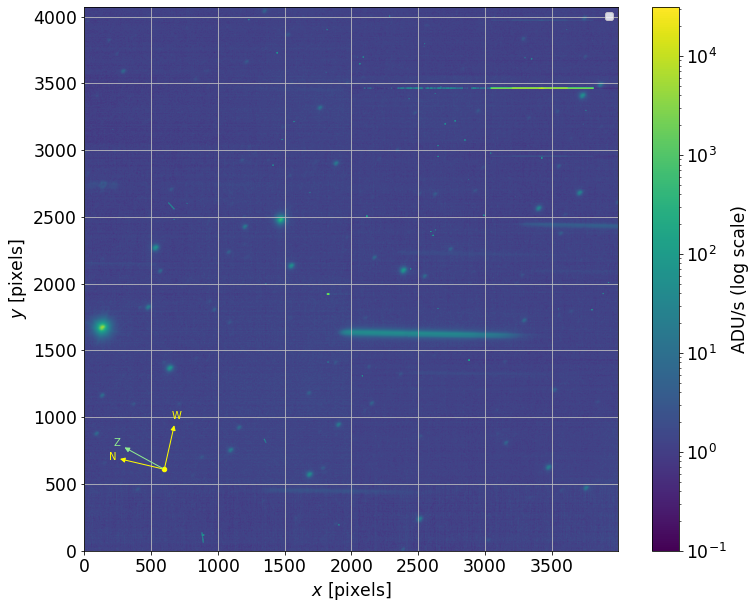

In [131]:
image.plot_image(figsize=(12, 10),scale="log")

In [132]:
filename_image

'Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits'

In [133]:
guess = [1800, 2500] # filename_image=df['file'][0] , Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_188.fits, moved truncated
guess = [1800, 2500] # filename_image=df['file'][1], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_189.fits, idem
guess = [1800, 2500] # filename_image=df['file'][2], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_190.fits, idem
guess = [2100, 1750] # filename_image=df['file'][3], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_200.fits, horrible
guess = [2100, 1750] # filename_image=df['file'][4], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_201.fits, bad not rec
guess = [2100, 1750] # filename_image=df['file'][5], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_202.fits bad not rec
guess = [2100, 1750] # filename_image=df['file'][6], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_203.fits bad not rec
guess = [200, 1700] # filename_image=df['file'][7], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_204.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][8], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_205.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][9], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_206.fits  Reconstruit
guess = [200, 1700] # filename_image=df['file'][10], Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits  Reconstruit

2021-04-18 21:01:03  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                  c0_1        
    ----------------- -------------------- ---------------------
    9.602689532413379 -0.03742188592326153 -0.019229796688478004
2021-04-18 21:01:03  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 16 iterations because the relative change of cost is below ftol=1.25e-05.


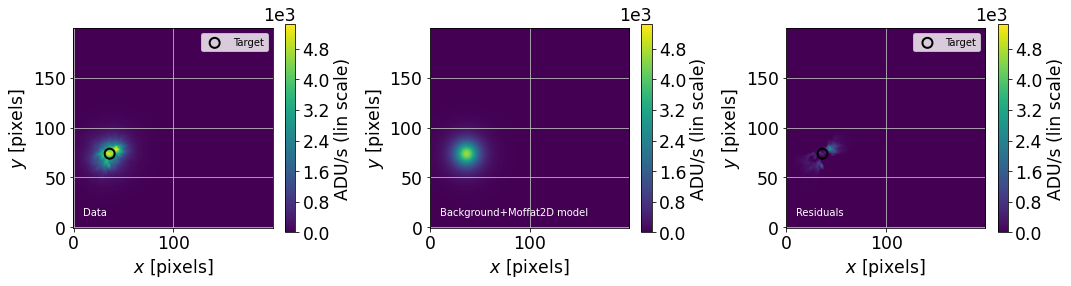

2021-04-18 21:01:05  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5.8139534883720933e-05.


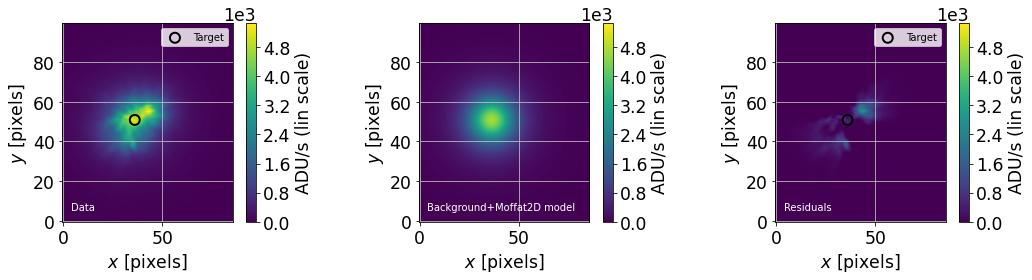

2021-04-18 21:01:05  Image      find_target          INFO   
	X,Y target position in pixels: 136.075,1673.858


In [134]:

parameters.VERBOSE = True
parameters.DEBUG = True
x1, y1 = find_target(image, guess,rotated=False, use_wcs=False)

In [135]:
print(x1,y1)

136.0749523487938 1673.8578893146596


In [136]:
thumbnail=np.copy(image.data[int(y1)-50:int(y1)+50,int(x1)-50:int(x1)+50])
thumbnail_y=thumbnail.sum(axis=1)
thumbnail_x=thumbnail.sum(axis=0)
xx=np.linspace(int(x1)-50,int(x1)+50,len(thumbnail_x))
yy=np.linspace(int(y1)-50,int(y1)+50,len(thumbnail_y))
k0=kurtosis(thumbnail,axis=None,bias=True,fisher=True)
kx=kurtosis(thumbnail_x,bias=True,fisher=True)
ky=kurtosis(thumbnail_y,bias=True,fisher=True)
s0=skew(thumbnail,axis=None,bias=True)
sx=skew(thumbnail_x,bias=True)
sy=skew(thumbnail_y,bias=True)

In [137]:
shape_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}, Skx = {:3.3f}, Sky = {:3.3f} \n'.format(s0,sx,sy),
        r'kurtosis : K0  = {:3.3f}, Kx  = {:3.3f},  Ky = {:3.3f}'.format(k0,kx,ky)))

In [138]:
skew_str='\n'.join((
        r'skew     : Sk0 = {:3.3f}'.format(s0),
        r'             : Skx = {:3.3f}'.format(sx),
        r'             : Sky = {:3.3f}'.format(sy)))

In [139]:
kurt_str='\n'.join((
        r'kurtosis : K0 = {:3.3f}'.format(k0),
        r'             : Kx = {:3.3f}'.format(kx),
        r'             : Ky = {:3.3f}'.format(ky)))

In [140]:
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

Text(0.05, 0.4, 'kurtosis : K0 = 16.872\n             : Kx = -0.364\n             : Ky = 0.210')

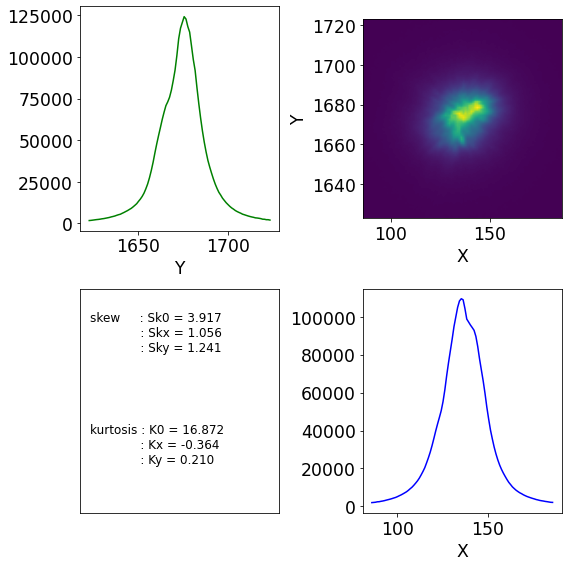

In [141]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(222)
ax.imshow(thumbnail,origin="lower",extent=(int(x1)-50,int(x1)+50,int(y1)-50,int(y1)+50))
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax=fig.add_subplot(221)
ax.plot(yy,thumbnail_y,"g")
ax.set_xlabel("Y")
ax=fig.add_subplot(224)
ax.plot(xx,thumbnail_x,"b")
ax.set_xlabel("X")
plt.tight_layout()
ax=fig.add_subplot(223)
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])
#ax.text(0.05, 0.95, shape_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.9, skew_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.05, 0.4, kurt_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)

# Go for spectrum reconstruction

2021-04-18 21:01:06  spectractor.extractor.extractor Spectractor          INFO   
	Start SPECTRACTOR


Section: paths
x disperser_dir: extractor/dispersers/	=> parameters.DISPERSER_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/	 <class 'str'>
x throughput_dir: simulation/AuxTelThroughput/	=> parameters.THROUGHPUT_DIR: /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/simulation/AuxTelThroughput/	 <class 'str'>
Section: instrument
x obs_name: AUXTEL	=> parameters.OBS_NAME: AUXTEL	 <class 'str'>
x obs_altitude: 2.66299616375123	=> parameters.OBS_ALTITUDE: 2.66299616375123	 <class 'float'>
x obs_latitude: -30.2446389756252	=> parameters.OBS_LATITUDE: -30.2446389756252	 <class 'float'>
x obs_diameter: 1.20	=> parameters.OBS_DIAMETER: 1.2 m	 <class 'astropy.units.quantity.Quantity'>
x obs_epoch: J2000.0	=> parameters.OBS_EPOCH: J2000.0	 <class 'str'>
x obs_transmission_systematics: 0.005	=> parameters.OBS_TRANSMISSION_SYSTEMATICS: 0.005	 <class 'float'>
x obs_object_type: STAR	=> paramet

2021-04-18 21:01:07  Image      load_AUXTEL_image    INFO   
	Loading AUXTEL image /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.fits...
2021-04-18 21:01:07  Image      load_AUXTEL_image    INFO   
	Image loaded
2021-04-18 21:01:07  Image      load_image           INFO   
	Loading disperser ronchi170lpmm...
2021-04-18 21:01:07  Hologram   load_specs           INFO   
	Load disperser ronchi170lpmm:
	from /Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/extractor/dispersers/ronchi170lpmm
2021-04-18 21:01:07  Hologram   load_specs           INFO   
	Grating characteristics:
	N = 170.00 +/- 0.10 grooves/mm
	Average tilt of 0.0 degrees
2021-04-18 21:01:11  Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=8.366478661702116 but average of self.read_out_noise is 8.5.
2021-04-18 21:01:11  TelescopeTransmission reset_lambda_rang

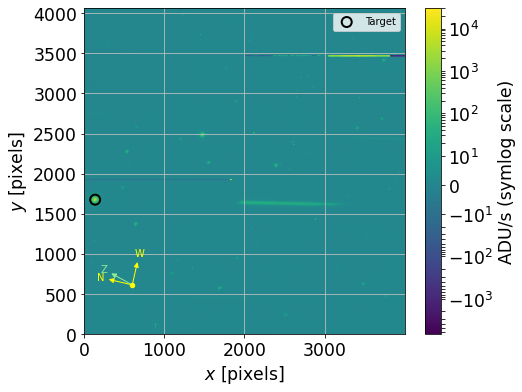

2021-04-18 21:01:16  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the image with guess=[ 136.07495235 1673.85788931]...
2021-04-18 21:01:16  spectractor.extractor.images find_target          INFO   
	No WCS /Users/dagoret/DATA/AuxTelData2021/ronchi170lpmm/FlipCleans/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207_wcs/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207.wcs available, use 2D fit to find target pixel position.
2021-04-18 21:01:16  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0                c1_0                 c0_1        
    ----------------- --------------------- --------------------
    4.423342135056814 0.0010552177745165384 0.001085002252104529
2021-04-18 21:01:17  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 21 iterations because the relative change of cost is below ftol=1.

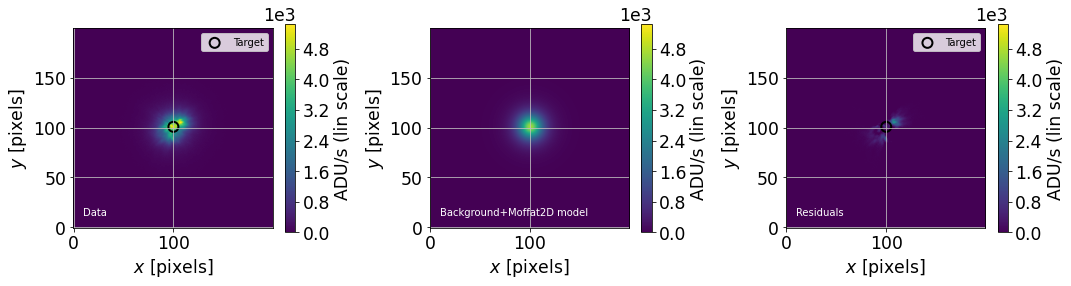

2021-04-18 21:01:17  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=5e-05.


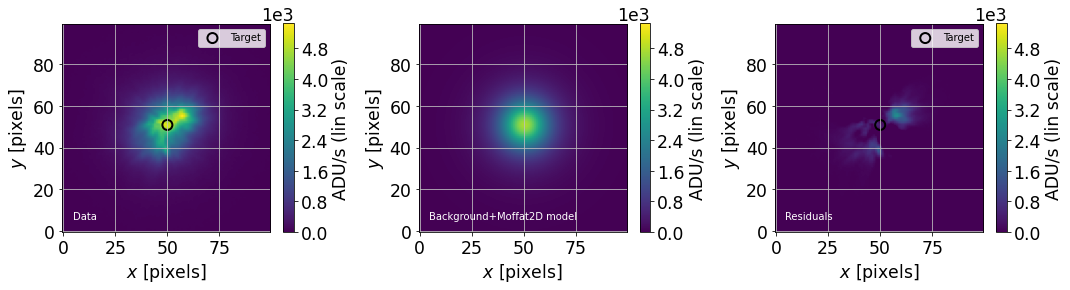

2021-04-18 21:01:18  Image      find_target          INFO   
	X,Y target position in pixels: 136.040,1673.840


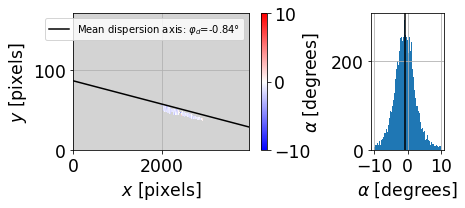

2021-04-18 21:01:20  Image      turn_image           INFO   
	Rotate the image with angle theta=-0.84 degree
/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


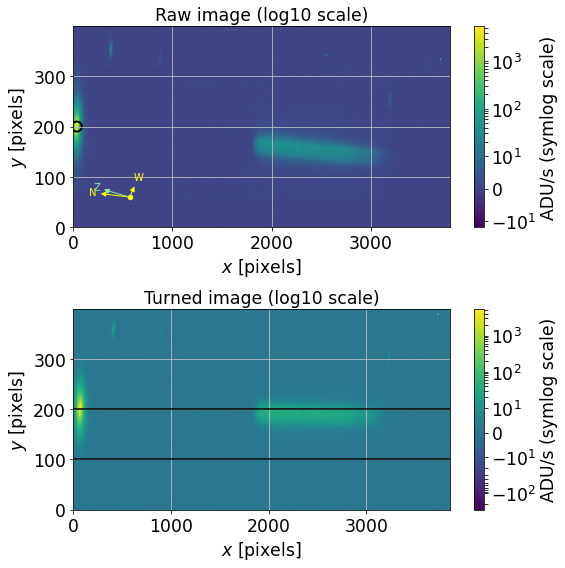

2021-04-18 21:01:31  spectractor.extractor.extractor Spectractor          INFO   
	Search for the target in the rotated image...
2021-04-18 21:01:31  spectractor.tools fit_poly2d_outlier_removal INFO   
	Model: Polynomial2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Degree: 1
Parameters:
           c0_0               c1_0                 c0_1        
    ----------------- -------------------- --------------------
    42.47978942784767 0.005611857490938307 0.051053497136857764
2021-04-18 21:01:31  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 4 iterations because the relative change of cost is below ftol=5e-05.


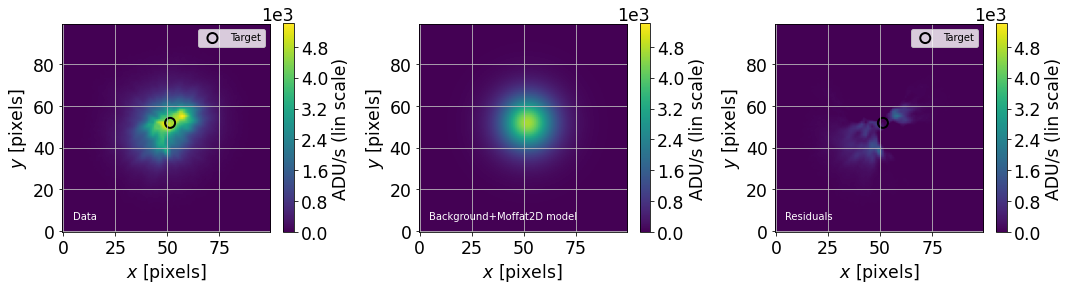

2021-04-18 21:01:32  spectractor.fit.fitter gradient_descent     INFO   
	Gradient descent terminated in 3 iterations because the relative change of cost is below ftol=0.0002.


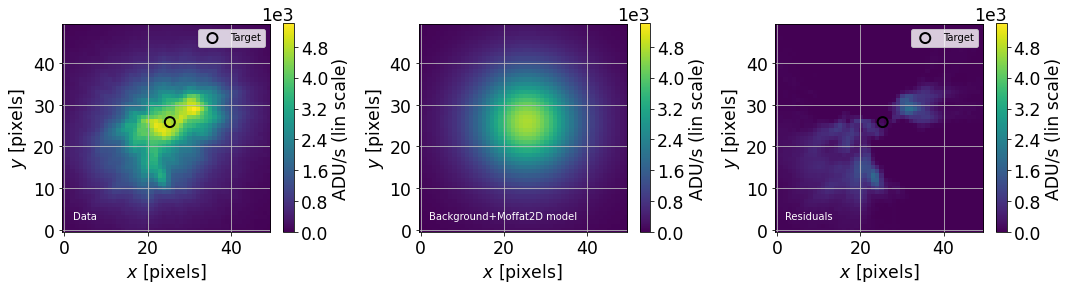

2021-04-18 21:01:33  Image      find_target          INFO   
	X,Y target position in pixels: 172.360,1676.856
2021-04-18 21:01:33  Spectrum   __init__             INFO   
	Spectrum info copied from image
2021-04-18 21:01:33  TelescopeTransmission reset_lambda_range   INFO   
	With filter RG610, set parameters.LAMBDA_MIN=565.0000000000005 and parameters.LAMBDA_MAX=1089.8000000001198.
2021-04-18 21:01:33  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extracting spectrum from image: spectrum with width 2*20 pixels and background from 140 to 180 pixels
2021-04-18 21:01:33  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop rotated image [1861:3471,1496:1856] (size (1610, 360))


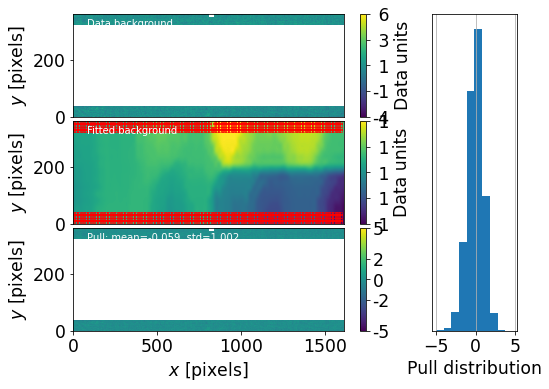

2021-04-18 21:01:37  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Start PSF1D transverse fit...
2021-04-18 21:01:53  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: amplitude has a null Jacobian; parameter is fixed at its last known current value (-23.059172644670554).
2021-04-18 21:01:53  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: y_c has a null Jacobian; parameter is fixed at its last known current value (180.0).
2021-04-18 21:01:53  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: gamma has a null Jacobian; parameter is fixed at its last known current value (3.0).
2021-04-18 21:01:53  spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha has a null Jacobian; parameter is fixed at its last known current value (2.0).
2021-04-18 21:01:53  spectractor.fit.fitter gradient_descent     WARNING 
	Gradient descent terminated in 0 iterations because all parameters have null Jacobian.
2021-04-18 21:01:53  spect

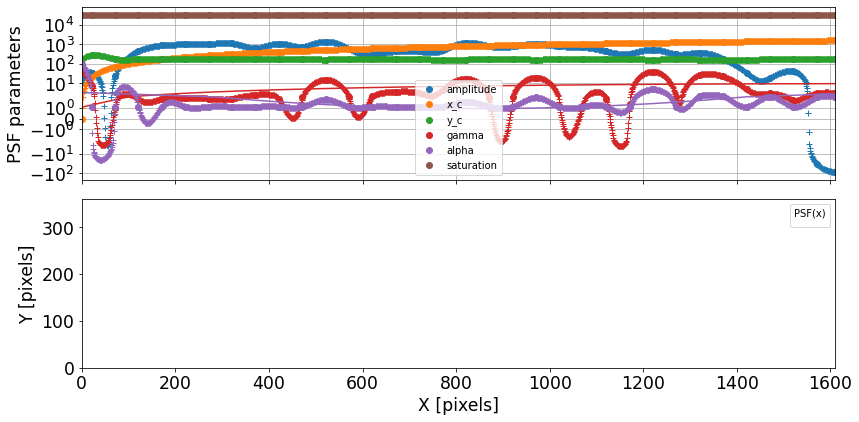

2021-04-18 21:02:04  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=0: initial cost=7.4197e+05 initial chisq_red=11.521
		 Line search: alpha_min=0.382 iter=3 funcalls=7
	Parameter shifts: [-0.87947422 -0.98253554  0.04449663  2.37132821  5.3584079   2.8171215
  0.05309353  1.12089989  0.15208253]
	New parameters: [-5.10833806 -2.90188633  8.4454402  11.04717451 13.85291298  1.64007879
  1.65477     1.92402913  0.54663403]
	Final cost=7.0968e+05 final chisq_red=11.02 computed in 2.03s
2021-04-18 21:02:07  spectractor.fit.fitter gradient_descent     INFO   
	Iteration=1: initial cost=7.0968e+05 initial chisq_red=11.02
		 Line search: alpha_min=3.93 iter=1 funcalls=7
	Parameter shifts: [ -8.73523005 -10.64072222  -0.27821936   0.36785079 -16.34874143
 -22.53380055  -3.99956959  -2.07842203  -9.01606472]
	New parameters: [-13.84356811 -13.54260855   8.16722085  11.4150253   -2.49582845
 -20.89372176  -2.34479959  -0.1543929   -8.46943069]
	Final cost=3.2524e+05 final chisq

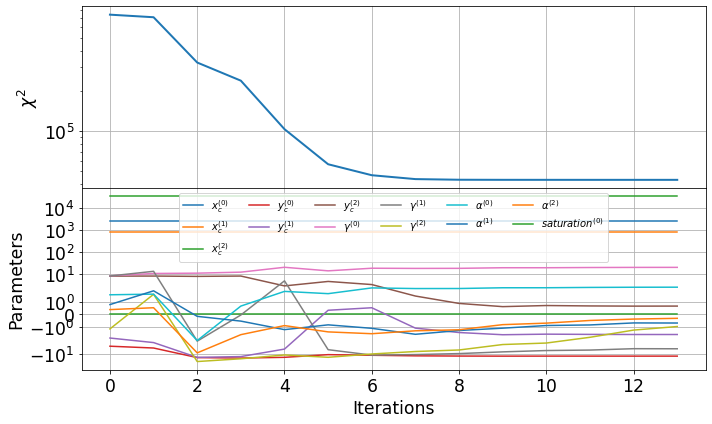

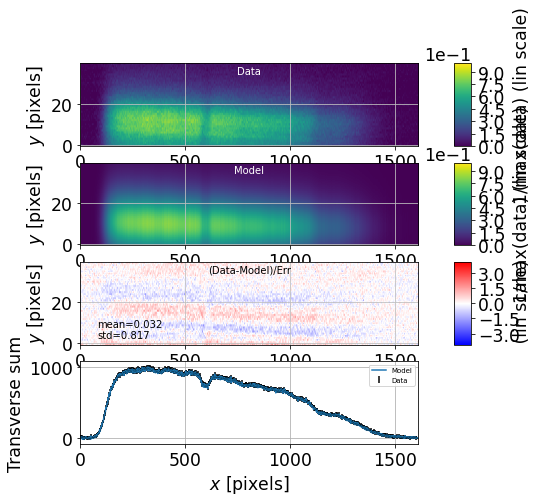

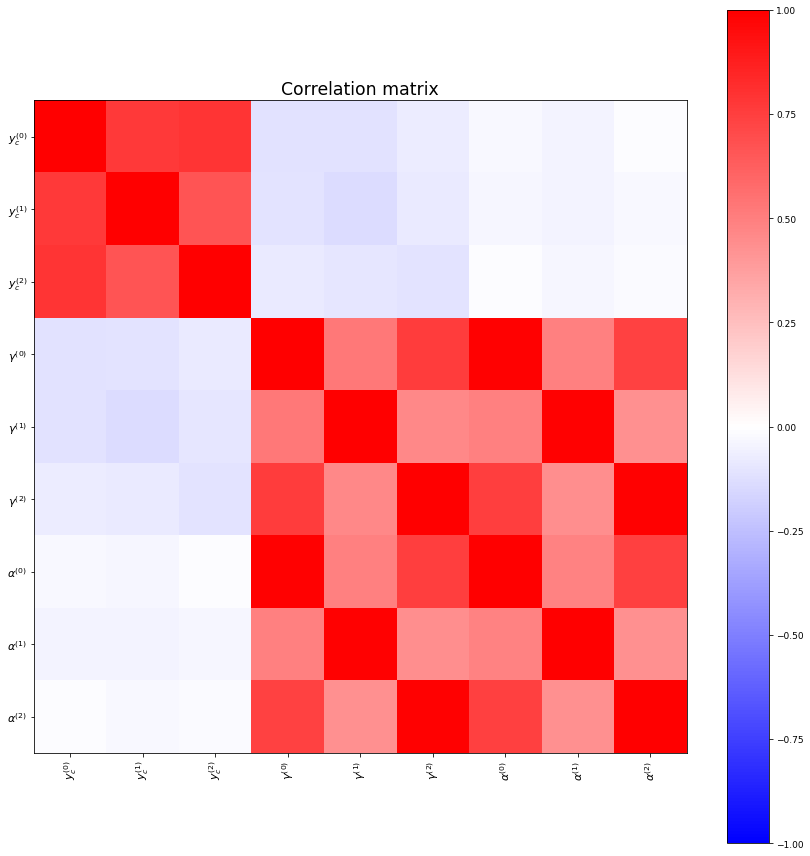

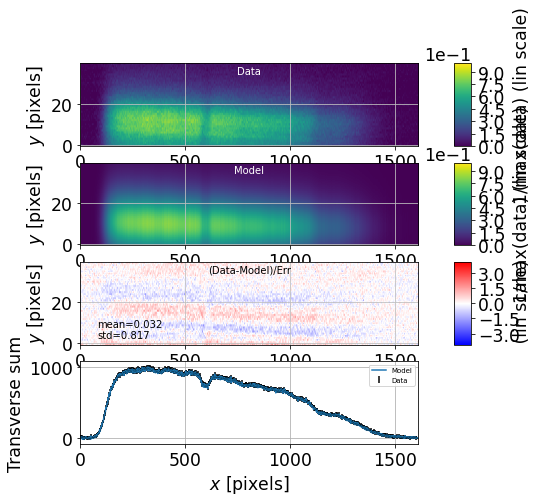

2021-04-18 21:02:36  spectractor.extractor.extractor extract_spectrum_from_image DEBUG  
	Transverse fit table before derotation:
     amplitude       x_c   ...          Dy         Dy_disp_axis
------------------- ------ ... ------------------- ------------
  7.415629285807212    0.0 ...   -9.57520031014451          0.0
 -6.994111987134793    1.0 ...  -9.579768154830276          0.0
 -4.360442155894982    2.0 ...  -9.584332843122667          0.0
  13.72065597674831    3.0 ...  -9.588894375021681          0.0
 15.754571432843163    4.0 ...  -9.593452750527291          0.0
  21.80730076375247    5.0 ...  -9.598007969639525          0.0
  8.683112287781443    6.0 ...  -9.602560032358355          0.0
 3.2124757144447313    7.0 ...  -9.607108938683837          0.0
-12.249825460054264    8.0 ...  -9.611654688615886          0.0
 1.6173719486034823    9.0 ...  -9.616197282154587          0.0
                ...    ... ...                 ...          ...
 13.534731097188121 1599.0 ... -12.846

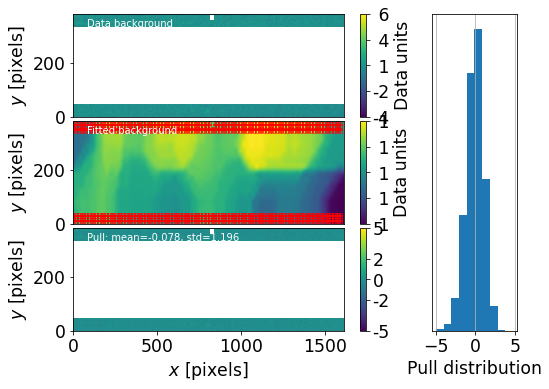

2021-04-18 21:02:40  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Background statistics: mean=0.950 ADU/s, RMS=1.704 ADU/s.
2021-04-18 21:02:40  spectractor.extractor.extractor extract_spectrum_from_image INFO   
	Extract spectrogram: crop image [1824:3434,1445:1830] (size (1610, 385))
	New target position in spectrogram frame: [-1687.960272137217, 228.8402661073285]


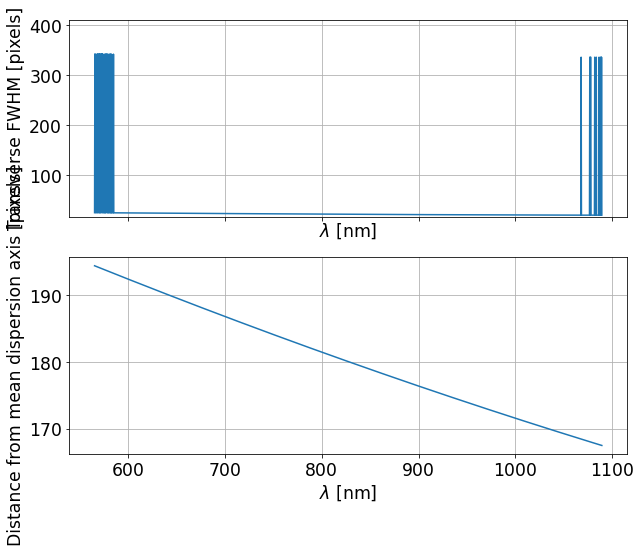

/Users/dagoret/.local/lib/python3.7/site-packages/Spectractor-2.1-py3.7.egg/spectractor/tools.py:1713: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(vmin=vmin, vmax=vmax, linthresh=10)


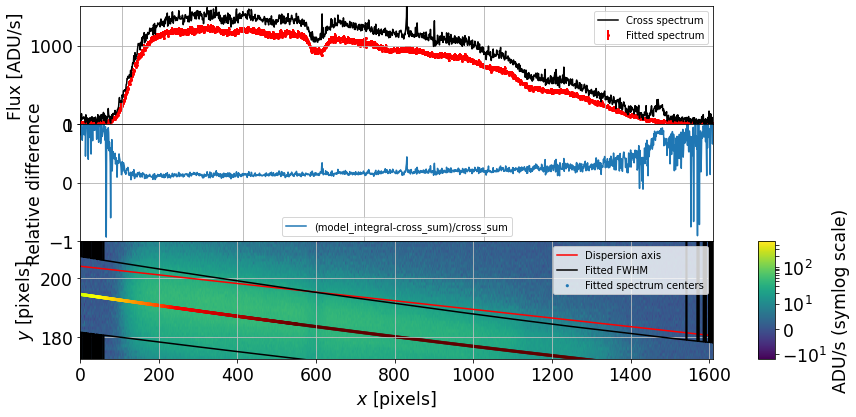

2021-04-18 21:02:42  spectractor.extractor.extractor Spectractor          INFO   
	Calibrating order 1 spectrum...


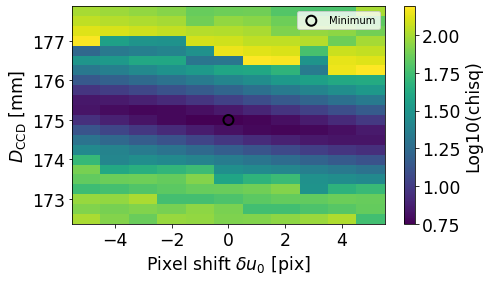

spectrum/calibrate_spectrum::pixel_shift_step= 1.0
spectrum/calibrate_spectrum::parameters.DISTANCE2CCD_ERR= 0.5
spectrum/calibrate_spectrum::error= (0.5, 1.0)
spectrum/calibrate_spectrum::start= [174.9980011   0.       ]


2021-04-18 21:03:10  Spectrum   calibrate_spectrum   INFO   
	Order0 total shift: -0.055pix
	D = 174.986 mm (default: DISTANCE2CCD = 175.00 +/- 0.50 mm, -0.0 sigma shift)
2021-04-18 21:03:10  astropy    _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
2021-04-18 21:03:10  Spectrum   save_spectrum        INFO   
	Spectrum saved in ./outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207_spectrum.fits
2021-04-18 21:03:10  Spectrum   save_spectrogram     INFO   
	Spectrogram saved in ./outputs_ronchi170lpmm/Cor_ronchi170lpmm_RG610_HD75519_2021-03-11_207_spectrogram.fits


 Line Tabulated Detected   Shift    ...   Chisq    Eqwidth_mod Eqwidth_data
          nm       nm        nm     ...  reduced        nm          nm     
----- --------- -------- ---------- ... ---------- ----------- ------------
          760.3 757.4929 -2.8070679 ... 0.64847183  0.82732797    2.2373168
$O_2$     763.1 764.7206  1.6205521 ... 0.64847183    1.433142    2.2533867


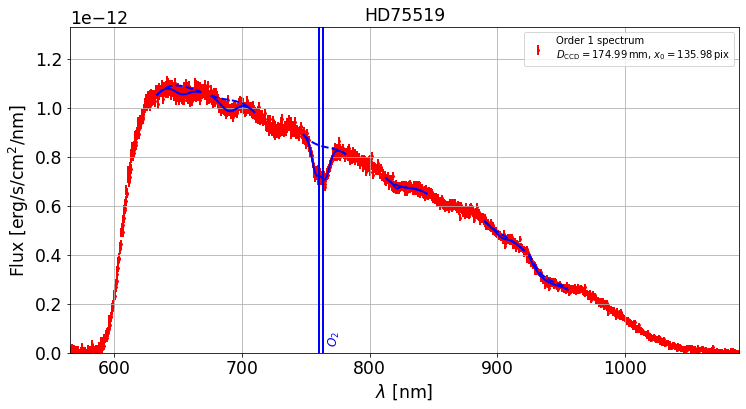

In [142]:
spectrum = Spectractor(filename, output_directory, guess=[x1,y1], target_label=target, disperser_label=disperser_label, config=config)